In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path
from warnings import filterwarnings 

In [2]:
# Initializing clean csv file

cleanpath = Path('../csv/clean_data.csv')
file = pd.read_csv(cleanpath)
file.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
0,6238,F,250.0,46,NO,0,2,NO,1,28.73
1,6238,F,260.0,52,NO,0,2,NO,2,29.43
2,6238,F,237.0,58,NO,0,2,NO,3,28.50
3,11263,F,228.0,43,NO,0,2,NO,1,30.30
4,11263,F,230.0,49,NO,0,2,NO,2,31.36


# General

In [179]:

# Narrow down data set to relevant columns

sex_df = file[['ID','SEX','PREVALENT CHD','PERIOD']]
sex_df

chd = sex_df.loc[sex_df['PREVALENT CHD']=='YES',:]
howmanyparticipants = chd['ID'].count()
print(f' Total count of participants with CHD across all periods: {howmanyparticipants}')

chd_p1 = chd.loc[chd['PERIOD']==1,:]
howmanyinperiod1 = chd_p1['ID'].count()
print(f' Total count in period 1: {howmanyinperiod1} ')

chd_p3 = chd.loc[chd['PERIOD']==3,:]
howmanyin3 = chd_p3['ID'].count()
print(f' Total count in period 3: {howmanyin3}')


 Total count of participants with CHD across all periods: 517
 Total count in period 1: 64 
 Total count in period 3: 300


In [50]:
# CHOLESTROL AND CHD CORRELATION

#Create a new dataframe with relevant columns

chol_df = file[['ID','SEX','TOTAL CHOLESTROL','PREVALENT CHD','SMOKING STATUS','CIGS PER DAY','PERIOD']]
chol_df.head()


,ID,SEX,TOTAL CHOLESTROL,PREVALENT CHD,SMOKING STATUS,CIGS PER DAY,PERIOD
0,6238,F,250.0,NO,NO,0,1
1,6238,F,260.0,NO,NO,0,2
2,6238,F,237.0,NO,NO,0,3
3,11263,F,228.0,NO,NO,0,1
4,11263,F,230.0,NO,NO,0,2


# Bin Cholestrol into readable groups [abnormally low, healthy, at risk, abnormally high] 

In [181]:
# CREATING CHOLESTEROL LEVELS 

# < 120 = abnormally low
# 120-200 = healthy
#  200-239 =  at risk
# 240+ = abnormally high

min_chol = chol_df['TOTAL CHOLESTROL'].min()
max_chol = chol_df['TOTAL CHOLESTROL'].max()
print(f' The min cholesterol in the population sample in period 1 is {min_chol} and max cholesterol is {max_chol}')

bins = [0, 119.9,199.9,239,float('inf')]

bin_names = ['abnormally low','healthy','at risk','abnormally high']

# Slicing our data in bins

chol_df['CHOLESTROL LEVEL'] = pd.cut(chol_df['TOTAL CHOLESTROL'],bins,
                                     labels=bin_names,include_lowest=True)

chol_df.head(10)

 The min cholesterol in the population sample in period 1 is 112.0 and max cholesterol is 638.0


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_29094/1419685837.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chol_df['CHOLESTROL LEVEL'] = pd.cut(chol_df['TOTAL CHOLESTROL'],bins,


,ID,SEX,TOTAL CHOLESTROL,PREVALENT CHD,SMOKING STATUS,CIGS PER DAY,PERIOD,CHOLESTROL LEVEL
0,6238,F,250.0,NO,NO,0,1,abnormally high
1,6238,F,260.0,NO,NO,0,2,abnormally high
2,6238,F,237.0,NO,NO,0,3,at risk
3,11263,F,228.0,NO,NO,0,1,at risk
4,11263,F,230.0,NO,NO,0,2,at risk
5,11263,F,220.0,NO,NO,0,3,at risk
6,14367,M,260.0,NO,NO,0,1,abnormally high
7,14367,M,292.0,NO,NO,0,2,abnormally high
8,14367,M,280.0,NO,NO,0,3,abnormally high
9,16365,M,225.0,NO,YES,30,1,at risk


In [52]:
# Filter by Period 1 only

chol_p1 = chol_df.loc[chol_df['PERIOD']==1,:]
chol_p1

# Filter again by PREVALENCT CHD=='YES'

chol_p1 = chol_p1.loc[chol_p1['PREVALENT CHD']=='YES',:]
chol_p1

,ID,SEX,TOTAL CHOLESTROL,PREVALENT CHD,SMOKING STATUS,CIGS PER DAY,PERIOD,CHOLESTROL LEVEL
54,68397,M,227.0,YES,NO,0,1,at risk
177,208566,M,288.0,YES,YES,20,1,abnormally high
312,428306,M,265.0,YES,YES,20,1,abnormally high
420,556045,F,194.0,YES,NO,0,1,healthy
426,571377,F,320.0,YES,NO,0,1,abnormally high
...,...,...,...,...,...,...,...,...
8058,9746116,F,186.0,YES,YES,10,1,healthy
8112,9802787,M,218.0,YES,NO,0,1,at risk
8142,9838321,M,215.0,YES,YES,10,1,at risk
8163,9868819,F,252.0,YES,NO,0,1,abnormally high


# Plot Bar Graph of Cholestrol level Distribution of CHD Participants

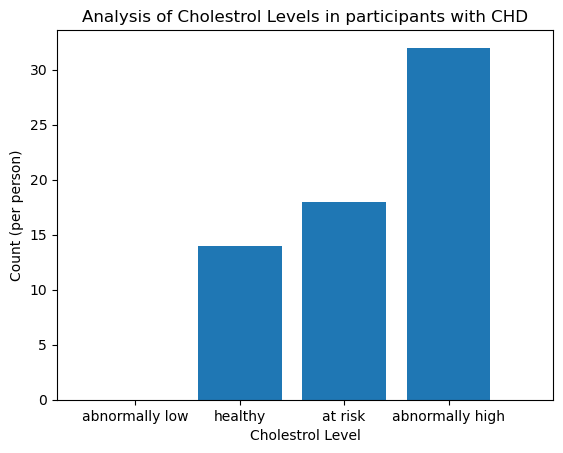

In [53]:
# Plotting Histogram 

cholestrol_yaxis = chol_p1.groupby(['CHOLESTROL LEVEL'])['ID'].count()
cholestrol_yaxis

plt.bar(bin_names,cholestrol_yaxis,align='center')

plt.xlabel('Cholestrol Level')
plt.ylabel('Count (per person)')
plt.xlim(-0.75,len(bin_names))
plt.title('Analysis of Cholestrol Levels in participants with CHD')

plt.show()

# CHOLESTROL LEVEL
# abnormally low      0
# healthy            14
# at risk            18
# abnormally high    32

In [185]:
# Filtering participants with CHD by Sex, to view if there's any correlation 

chol_fm = chol_p1.loc[chol_p1['SEX']=='F',:]
chol_fm_count = chol_fm['SEX'].count()
print(f' The total female count with CHD in Period 1 is: {chol_fm_count}')

chol_m = chol_p1.loc[chol_p1['SEX']=='M',:]
chol_m_count = chol_m['SEX'].count()
print(f' The total male count with CHD in Period 1 is: {chol_m_count}')


female_chol_yaxis = chol_fm.groupby(['CHOLESTROL LEVEL'])['ID'].count()
print(f' {female_chol_yaxis} distribution for FEMALES')

male_chol_yaxis = chol_m.groupby(['CHOLESTROL LEVEL'])['ID'].count()
print(f' {male_chol_yaxis} distribution for MALES')


 The total female count with CHD in Period 1 is: 25
 The total male count with CHD in Period 1 is: 39
 CHOLESTROL LEVEL
abnormally low      0
healthy             5
at risk             6
abnormally high    14
Name: ID, dtype: int64 distribution for FEMALES
 CHOLESTROL LEVEL
abnormally low      0
healthy             9
at risk            12
abnormally high    18
Name: ID, dtype: int64 distribution for MALES


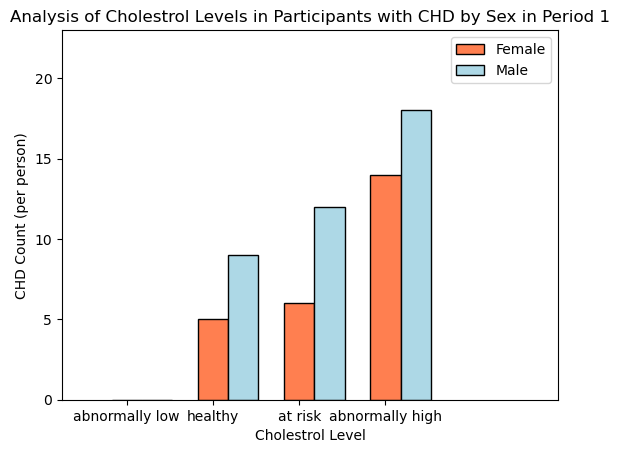

In [156]:
# Plotting Histogram of Cholestrol levels in relation to CHD prevalence BY SEX
bar_width = 0.35
x1 = range(len(bin_names))
x2 = [x + bar_width for x in x1]

plt.bar(x1,female_chol_yaxis,width=bar_width, align='center',label = 'Female',color='coral',edgecolor='black')
plt.bar(x2,male_chol_yaxis,width=bar_width, align='center',label = 'Male',color='lightblue',edgecolor='black')
plt.xlabel('Cholestrol Level')
plt.ylabel('CHD Count (per person)')
plt.xlim(-0.75,len(bin_names)+1)
plt.ylim(0, max(max(female_chol_yaxis), max(male_chol_yaxis)) + 5)

tick_pla = [value for value in x1]
plt.xticks(tick_pla, bin_names)

plt.title('Analysis of Cholestrol Levels in Participants with CHD by Sex in Period 1')
plt.legend()
plt.show()

# Finding: 'abnormally high' cholesterol level contained largest count of population sample. Male's also had higher counts in all cholesterol levels, 'abnormally low' being the exception.

In [56]:
# Creating pivot table to better analyse relationship between CHD, Cholestrol and Sex

cholestrol_table = pd.DataFrame()
cholestrol_table = chol_p1.groupby(['SEX','CHOLESTROL LEVEL'])['PREVALENT CHD'].count()

# Reset index to convert it to a table, from a Series
cholestrol_table = cholestrol_table.reset_index() 
cholestrol_table

# Create Pivot Table with above
cholestrol_pivot = cholestrol_table.pivot(index = 'CHOLESTROL LEVEL', columns='SEX',values='PREVALENT CHD')
cholestrol_pivot

SEX,F,M
CHOLESTROL LEVEL,,
abnormally low,0,0
healthy,5,9
at risk,6,12
abnormally high,14,18


# Analysing CHD, CHOLESTROL AND SMOKING in PERIOD 1

In [58]:
# Creating pivot table for cleaner analysis between CHD, Cholestrol and Smoking status

chol_smoking_table = pd.DataFrame()
chol_smoking_table = chol_p1.groupby(['SMOKING STATUS','CHOLESTROL LEVEL'])['PREVALENT CHD'].count()

# Reset index to convert it to a table, from a Series
chol_smoking_table = chol_smoking_table.reset_index() 
chol_smoking_table

# Create Pivot Table with above
chol_smoking_pivot = chol_smoking_table.pivot(index = 'CHOLESTROL LEVEL', columns='SMOKING STATUS',values='PREVALENT CHD')
chol_smoking_pivot


SMOKING STATUS,NO,YES
CHOLESTROL LEVEL,,
abnormally low,0,0
healthy,8,6
at risk,12,6
abnormally high,20,12


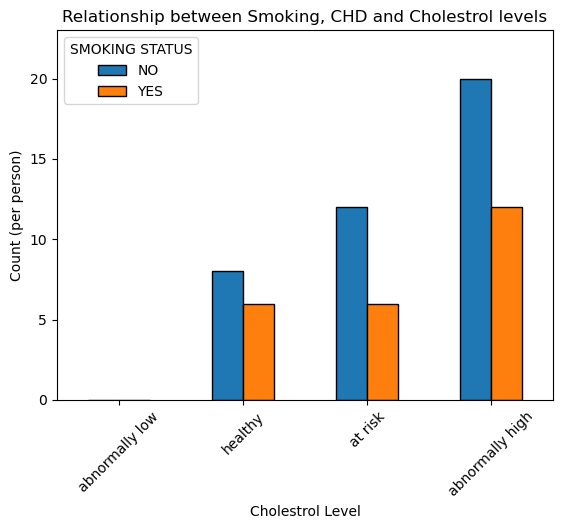

In [188]:
# Plot Smoking Status in Relation to Cholestrol Level for participants with CHD

chol_smoking_pivot.plot(kind='bar',xlabel='Cholestrol Level',label='Smoking Status',stacked=False,
                         rot=45,ylabel='Count (per person)',title='Relationship between Smoking, CHD and Cholestrol levels',
                         edgecolor ='black')

plt.ylim(0,23)
plt.show()

# Findings: Smoking status does not display a positive relationship with CHD and Cholesterol in Period 1, as majority of non-smokers
# tend to have 'at risk' to 'abnormally high' levels of cholesterol.

# Analysis for CHD, CHOLESTROL AND SMOKING in PERIOD 3

In [164]:
# Filter by Period 3 only this time 

chol_p3 = chol_df.loc[chol_df['PERIOD']==3,:]
chol_p3

# Filter again by PREVALENT CHD=='YES'

chol_p3_yes = chol_p3.loc[chol_p3['PREVALENT CHD']=='YES',:]
chol_p3_yes

# Filtering by PREVALENT CHD == 'NO' for later use
chol_p3_no = chol_p3.loc[chol_p3['PREVALENT CHD']=='NO',:]
chol_p3_no

,ID,SEX,TOTAL CHOLESTROL,PREVALENT CHD,SMOKING STATUS,CIGS PER DAY,PERIOD,CHOLESTROL LEVEL
2,6238,F,237.0,NO,NO,0,3,at risk
5,11263,F,220.0,NO,NO,0,3,at risk
8,14367,M,280.0,NO,NO,0,3,abnormally high
11,16365,M,211.0,NO,NO,0,3,at risk
14,23727,F,159.0,NO,NO,0,3,healthy
...,...,...,...,...,...,...,...,...
8249,9973350,F,267.0,NO,NO,0,3,abnormally high
8252,9978986,F,243.0,NO,NO,0,3,abnormally high
8255,9982118,M,219.0,NO,NO,0,3,at risk
8258,9990894,F,228.0,NO,YES,20,3,at risk


In [125]:
# Creating pivot table for cleaner analysis between CHD, Cholestrol and Smoking status

chol_smoking_table3 = pd.DataFrame()
chol_smoking_table3 = chol_p3_yes.groupby(['SMOKING STATUS','CHOLESTROL LEVEL'])['PREVALENT CHD'].count()

# Reset index to convert it to a table, from a Series
chol_smoking_table3 = chol_smoking_table3.reset_index() 
chol_smoking_table3

# Create Pivot Table with above
chol_smoking_pivot3 = chol_smoking_table3.pivot(index = 'CHOLESTROL LEVEL', columns='SMOKING STATUS',values='PREVALENT CHD')
chol_smoking_pivot3

SMOKING STATUS,NO,YES
CHOLESTROL LEVEL,,
abnormally low,0,0
healthy,37,23
at risk,72,27
abnormally high,110,31


# Plotting a line graph of Period 3 only due to interesting finding of increased CHD count in Period 3 for better analysis

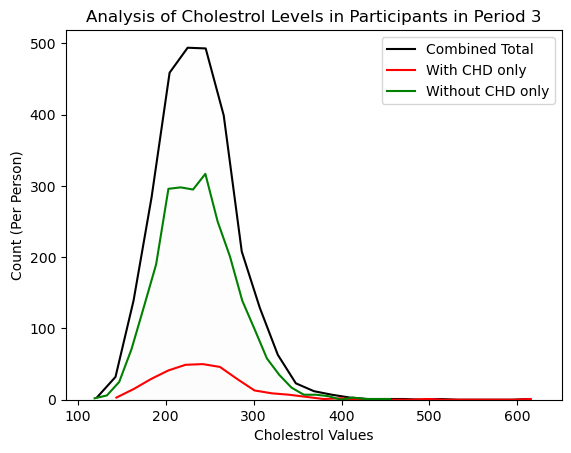

In [167]:
# Create a new table, with Cholestrol (numerical values), ID, CHD Prevalence

cholestrol_df = pd.DataFrame()
cholestrol_df = chol_p3[['ID','TOTAL CHOLESTROL','PREVALENT CHD']]
cholestrol_df

counts, bin_middles,_=plt.hist(cholestrol_df['TOTAL CHOLESTROL'],bins=25,alpha=0.005)
bin_widths=bin_middles[1:]-bin_middles[:-1]
bin_centers = bin_middles[:-1]+bin_widths/2
plt.plot(bin_centers,counts,'black',label = 'Combined Total')

counts_withchdonly, bin_middles2,_=plt.hist(chol_p3_yes['TOTAL CHOLESTROL'],bins=25,alpha=0.005)
bin_widths2=bin_middles2[1:]-bin_middles2[:-1]
bin_centers2= bin_middles2[:-1]+bin_widths2/2
plt.plot(bin_centers2,counts_withchdonly,'r',label = 'With CHD only')

counts_without, bin_middles3,_=plt.hist(chol_p3_no['TOTAL CHOLESTROL'],bins=25,alpha=0.005)
bin_widths3=bin_middles3[1:]-bin_middles3[:-1]
bin_centers3= bin_middles3[:-1]+bin_widths3/2
plt.plot(bin_centers3,counts_without,'g',label = 'Without CHD only')

plt.xlabel('Cholestrol Values')
plt.ylabel('Count (Per Person)')
plt.title('Analysis of Cholestrol Levels in Participants in Period 3')
plt.legend()
plt.show()

# Statistical Testing using quartiles, IQR and outliers for CHD participants' cholesterol values for better clarity of any correlation for Period 3

In [148]:
# POTENTIAL OUTLIERS USING QUARTILES, IQR ETC in CHOLESTROL TOTAL'S (inclusive +CHD)
# due to the interesting finding in period 3, we are looking for outliers in this period only
quartiles = chol_p3_yes['TOTAL CHOLESTROL'].quantile([0.25,0.5,0.75])

lowerquart = quartiles[0.25]
upperquart = quartiles[0.75]
median = quartiles[0.5]
iqr = upperquart - lowerquart

print(f' The lower quartile of cholestrol distribution in participants with CHD is {lowerquart}')
print(f' The upper quartile of cholestrol distribution in participants with CHD is {upperquart}')
print(f' The median value of cholestrol distribution in participants with CHD is {lowerquart}')

lowerbound_cholestrol = lowerquart - 1.5*iqr
upperbound_cholestrol = upperquart + 1.5*iqr

print(f'The lowerbound zone of cholestrol distribution in participants with CHD is {lowerbound_cholestrol}')
print(f'The upperbound zone of cholestrol distribution in participants with CHD is {upperbound_cholestrol}')


 The lower quartile of cholestrol distribution in participants with CHD is 208.0
 The upper quartile of cholestrol distribution in participants with CHD is 268.0
 The median value of cholestrol distribution in participants with CHD is 208.0
The lowerbound zone of cholestrol distribution in participants with CHD is 118.0
The upperbound zone of cholestrol distribution in participants with CHD is 358.0


In [157]:
# Finding where outliers may exist.

outlier_cholestrol = chol_p3_yes.loc[(chol_p3_yes['TOTAL CHOLESTROL'] < lowerbound_cholestrol) | (chol_p3_yes['TOTAL CHOLESTROL'] > upperbound_cholestrol)].reset_index()
print(f' The outliers that exist are the following values:')
outlier_cholestrol

 The outliers that exist are the following values:


,index,ID,SEX,TOTAL CHOLESTROL,PREVALENT CHD,SMOKING STATUS,CIGS PER DAY,PERIOD,CHOLESTROL LEVEL
0,359,482553,F,504.0,YES,NO,0,3,abnormally high
1,1001,1189726,F,625.0,YES,NO,0,3,abnormally high
2,1076,1287993,F,366.0,YES,NO,0,3,abnormally high
3,3053,3676172,M,360.0,YES,YES,20,3,abnormally high
4,5114,6255031,F,361.0,YES,NO,0,3,abnormally high
5,5339,6521946,F,378.0,YES,NO,0,3,abnormally high
6,5744,6992976,F,396.0,YES,NO,0,3,abnormally high
7,7538,9115104,F,390.0,YES,NO,0,3,abnormally high


# Boxplotting Period 3 data of TOTAL CHOLESTEROL among population sample

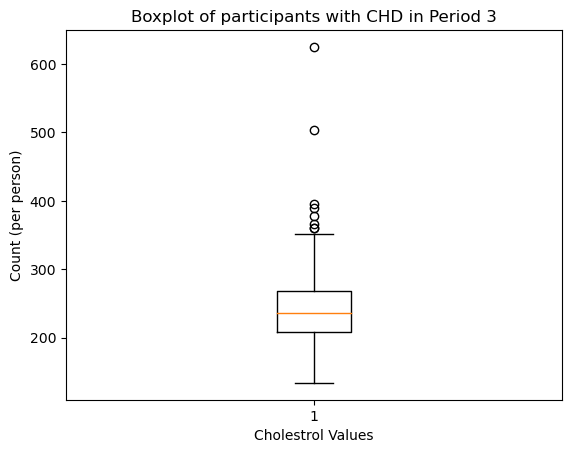

In [173]:
# Boxplotting Period 3 data of TOTAL CHOLESTEROL among population sample

plt.boxplot(chol_p3_yes['TOTAL CHOLESTROL'])
plt.title('Boxplot of participants with CHD in Period 3')
plt.xlabel('Cholestrol Values')
plt.ylabel('Count (per person)')
plt.show()

# Findings: All the outliers (total 8) have 'abnormally high' cholesterol levels, whilst no outliers under the lowerbound range.